In [1]:
# Activation functions
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


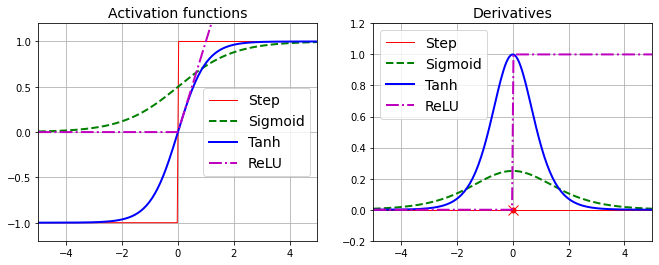

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
z = np.linspace(-5, 5, 200)


plt.figure(figsize=(11,4))


plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="top left", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [5]:
import tensorflow as tf
from tensorflow import keras

fashion_minst = keras.datasets.fashion_mnist
(X_train_full , Y_train_full) ,(X_test , Y_test) = fashion_minst.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape
# keras splits the data but it does not create a validation set , so we will create this ourselves , also scaling the pixels to take values 0-1 will also help in the learing of NN

(60000, 28, 28)

In [10]:
X_valid , X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
Y_valid , Y_train = Y_train_full[:5000] , Y_train_full[5000:]
# we need to categotrize the classed as this time it will be hard to deal with 10 calsses that dont represrnt a drawn number but a cloth type.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



In [12]:
# now lets create a model 
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape = [28 , 28]), 
                                 keras.layers.Dense(300 , activation = "relu"), 
                                 keras.layers.Dense( 100 , activation = "relu"), 
                                 keras.layers.Dense( 10 , activation = "softmax")
])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


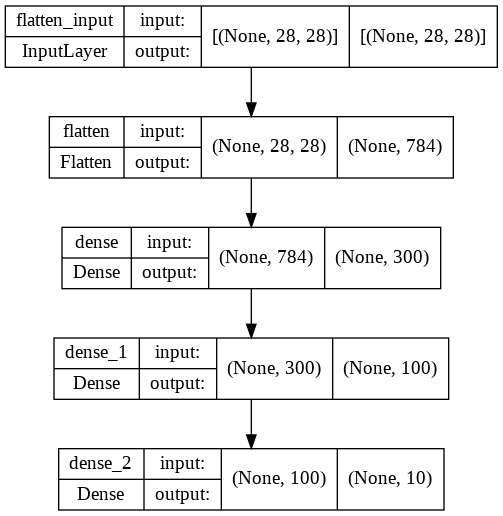

In [14]:
model.summary()
## or we can create an image to see further details more clearly
keras.utils.plot_model(model , "fashion_model.png", show_shapes= True)

In [17]:
# we can view the layers and the paremetrs of the currnent NN
model.layers

hidden_layer_1 = model.layers[1]
hidden_layer_1.name

'dense'

In [20]:
W , b = hidden_layer_1.get_weights()
print(W)
print(W.shape)
print(b)

## this validates that the initial Weights must be random to achive a real diverse learning across all the neurons

[[ 0.02807517 -0.01166443  0.01008918 ...  0.02363328  0.07235703
  -0.06966315]
 [-0.07226992  0.05539951  0.05347839 ... -0.05697404  0.0541172
  -0.06836084]
 [-0.03244872 -0.02182858 -0.02057123 ... -0.05016815  0.04793478
  -0.00706805]
 ...
 [-0.07022035 -0.05892288  0.06056695 ... -0.02790975 -0.06965045
  -0.00662466]
 [-0.04773526  0.05741096 -0.02245696 ...  0.02587976 -0.03274914
  -0.01278507]
 [-0.0528397   0.06209119 -0.02731342 ... -0.01153438 -0.03411912
   0.00441465]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [21]:
## next we need to complile the model using the complile function.


model.compile(loss="sparse_categorical_crossentropy" ,
              optimizer = "sgd" ,
              metrics=["accuracy"])


In [24]:
print(X_train.shape
      )
history = model.fit(X_train , Y_train , epochs=30 , validation_data=(X_valid , Y_valid))

(55000, 28, 28)
Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3242 - accuracy: 0.8842 - val_loss: 0.3389 - val_accuracy: 0.8810
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3158 - accuracy: 0.8866 - val_loss: 0.3360 - val_accuracy: 0.8834
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3086 - accuracy: 0.8884 - val_loss: 0.3610 - val_accuracy: 0.8750
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3018 - accuracy: 0.8906 - val_loss: 0.3297 - val_accuracy: 0.8822
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2948 - accuracy: 0.8945 - val_loss: 0.3257 - val_accuracy: 0.8850
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2899 - accuracy: 0.8959 - val_loss: 0.3358 - val_accuracy: 0.8820
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2844 - accuracy: 0.8978 - val_loss: 0.3153

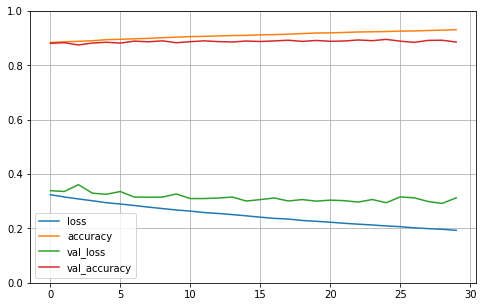

In [25]:
## we need to plot these figures now 

import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()